In [1]:
##You are required to use the dataset contained within the file “spambase.csv”, 
##conduct the following analysis and report on your findings:  
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing as preproc
from sklearn.decomposition import PCA
import numpy as np

In [2]:
spambase_url = "https://raw.githubusercontent.com/AngeloCarrinho/DataPreparation-SpamDatabase/refs/heads/main/spambase.csv"

In [3]:
spambase_df = pd.read_csv(spambase_url)

In [4]:
spambase_df.head(15)

,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,True
1,1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,True
2,2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,True
3,3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,True
4,4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,True
5,5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,...,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,True
6,6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,...,0.000,0.054,0.0,0.164,0.054,0.000,1.671,4,112,True
7,7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,...,0.000,0.206,0.0,0.000,0.000,0.000,2.450,11,49,True
8,8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,...,0.000,0.271,0.0,0.181,0.203,0.022,9.744,445,1257,True
9,9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,...,0.040,0.030,0.0,0.244,0.081,0.000,1.729,43,749,True


In [5]:
spambase_df.describe()

,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4601.000000,4601.000000,4601.000000,4595.000000,4599.000000,4600.000000,4601.000000,4586.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,2300.000000,0.104553,0.213015,0.281023,0.065453,0.095922,0.114208,0.105639,0.090067,0.239413,...,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285
std,1328.338624,0.305358,1.290575,0.504370,1.395454,0.273850,0.391441,0.401682,0.278616,0.644755,...,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,1150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000
50%,2300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000
75%,3450.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000
max,4600.000000,4.540000,14.280000,5.100000,42.810000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


In [6]:
spambase_df.describe(include=object)

,word_freq_our,word_freq_000,word_freq_hpl,word_freq_labs
count,4601,4601,4601,4351
unique,256,165,282,180
top,0,0,0,0
freq,2852,3921,3789,3881


In [7]:
#Characterisation of the data set: 
#size OK
size = spambase_df.shape
size = {'Size': size}
print(size)

{'Size': (4601, 59)}


In [8]:
#number of attributes OK
num_columns = spambase_df.shape[1]
num_columns = {'Number of Columns': num_columns}
print(num_columns)

{'Number of Columns': 59}


In [9]:
#has/does not have missing values ok
missing_values = spambase_df.isnull().sum()
missing_values_summary = missing_values[missing_values > 0]
print(missing_values_summary)

word_freq_all            6
word_freq_3d             2
word_freq_over           1
word_freq_internet      15
word_freq_addresses      9
word_freq_labs         250
word_freq_direct         3
word_freq_cs            14
word_freq_meeting        1
word_freq_table         40
dtype: int64


In [10]:
#number of observations
num_observations = spambase_df.shape[0]
print('Number of observations:', num_observations)

Number of observations: 4601


In [11]:
#and what these Characterisation mean in the context of this data.

In [12]:
#Replace missing values
spambase_df.fillna(0, inplace=True)

In [13]:
#Check missing values after replace with Zero 0 
missing_values = spambase_df.isnull().sum()
missing_values_summary = missing_values[missing_values > 0]
print(missing_values_summary)

Series([], dtype: int64)


In [14]:
le=preproc.LabelEncoder()

In [15]:
spambase_df["is_spam"]=le.fit_transform(spambase_df["is_spam"])

In [16]:
spambase_df["is_spam"].unique()

array([1, 0], dtype=int64)

In [17]:
spam_count = spambase_df[spambase_df['is_spam'] == True]['word_freq_free'].sum()
non_spam_count = spambase_df[spambase_df['is_spam'] == False]['word_freq_free'].sum()
labels = ['Spam', 'Non-Spam']
counts = [spam_count, non_spam_count]

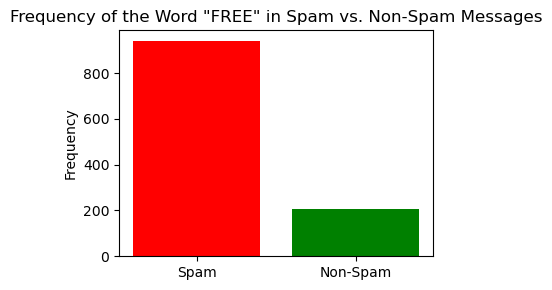

In [18]:
plt.figure(figsize=(4, 3))
plt.bar(labels, counts, color=['red', 'green'])
plt.title('Frequency of the Word "FREE" in Spam vs. Non-Spam Messages')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [19]:
total_messages = len(spambase_df)
free_in_spam = spambase_df[spambase_df['is_spam'] == True]['word_freq_free'].apply(lambda x: x > 0).sum()
free_in_non_spam = spambase_df[spambase_df['is_spam'] == False]['word_freq_free'].apply(lambda x: x > 0).sum()

In [20]:
percentage = [(free_in_spam / total_messages) * 100, (free_in_non_spam / total_messages) * 100]

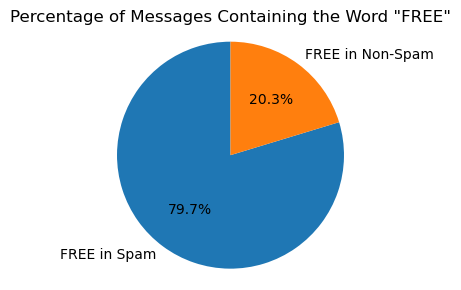

In [21]:
plt.figure(figsize=(4, 3))
plt.pie(percentage, labels=['FREE in Spam', 'FREE in Non-Spam'], autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Messages Containing the Word "FREE"')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.tight_layout()
plt.show()

In [22]:
spambase_df = spambase_df.apply(pd.to_numeric, errors='coerce')
spambase_df.dropna(inplace=True)

In [23]:
print(spambase_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4597 entries, 0 to 4600
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  4597 non-null   int64  
 1   word_freq_make              4597 non-null   float64
 2   word_freq_address           4597 non-null   float64
 3   word_freq_all               4597 non-null   float64
 4   word_freq_3d                4597 non-null   float64
 5   word_freq_our               4597 non-null   float64
 6   word_freq_over              4597 non-null   float64
 7   word_freq_remove            4597 non-null   float64
 8   word_freq_internet          4597 non-null   float64
 9   word_freq_order             4597 non-null   float64
 10  word_freq_mail              4597 non-null   float64
 11  word_freq_receive           4597 non-null   float64
 12  word_freq_will              4597 non-null   float64
 13  word_freq_people            4597 non-n

In [24]:
spambase_df = pd.read_csv('spambase.csv')

In [25]:
#Data cleaning: Handle non-numeric values
#Replace '???' or any non-numeric strings with Not Number
spambase_df.replace(['???', 'none', ''], np.nan, inplace=True)
spambase_df = spambase_df.apply(pd.to_numeric, errors='coerce')

In [26]:
#Drop rows with Not a Number values
spambase_df.dropna(inplace=True)

In [27]:
#Separate features and target to graph
X = spambase_df.drop('is_spam', axis=1)
y = spambase_df['is_spam']

In [28]:
#Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
#Fit PCA
pca = PCA()
pca.fit(X_scaled)

PCA()

In [31]:
#Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

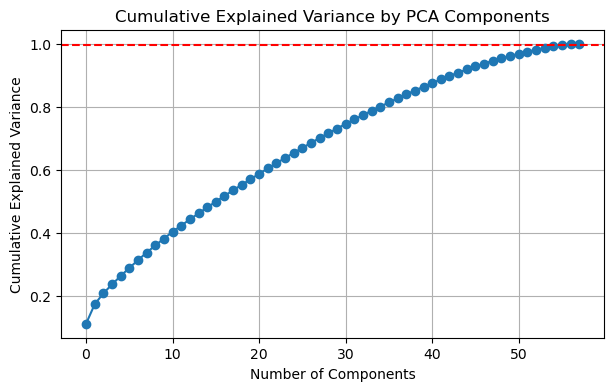

In [32]:
#Plot cumulative explained variance
plt.figure(figsize=(7, 4))
plt.plot(cumulative_variance, marker='o')
plt.axhline(y=0.995, color='r', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [33]:
#Determine the number of components for 99.5% variance
n_components = np.argmax(cumulative_variance >= 0.995) + 1
print(f'Minimum number of components to retain 99.5% variance: {n_components}')

Minimum number of components to retain 99.5% variance: 56


In [34]:
#Reduce dimensionality
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X_scaled)

In [35]:
#Display reduced data shape
print(f'Reduced data shape: {X_reduced.shape}')

Reduced data shape: (4273, 56)
